In [1]:
import datatable as dt
import numpy as np

# Import data set
train = dt.fread('voterfile.csv').to_pandas()
train = train.set_index('optimus_id', drop=True)
train.rename(columns={"maritalstatus": "marital_status", "dwellingtype": "dwelling_type",
                      'occupationindustry': 'occupation_industry'}, inplace=True)

In [2]:
# Have a look at the first five rows
train.head()

,age,party,ethnicity,marital_status,dwelling_type,income,education,cd,dma,occupation_industry,...,intrst_musical_instruments_in_hh,donates_to_liberal_causes,donates_to_conservative_causes,home_owner_or_renter,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
optimus_id,,,,,,,,,,,,,,,,,,,,,
861681,69.0,Republican,European,Married,Single Family Dwelling Unit,75k-125k,Bach Degree - Extremely Likely,4.0,LAS VEGAS DMA (EST.),Medical,...,nan,NaN,nan,Likely Homeowner,0.56,0.54,0.75,0.17,0.32,0.24
1084850,20.0,American Independent,European,nan,nan,Unknown,nan,2.0,RENO DMA (EST.),nan,...,nan,NaN,nan,nan,0.84,0.82,0.92,0.47,0.62,0.47
644435,28.0,Non-Partisan,European,nan,nan,Unknown,nan,3.0,LAS VEGAS DMA (EST.),nan,...,nan,NaN,nan,nan,0.49,0.34,0.70,0.04,0.09,0.06
57683,78.0,American Independent,European,Married,nan,Unknown,nan,3.0,LAS VEGAS DMA (EST.),nan,...,nan,NaN,nan,nan,0.84,0.79,0.91,0.24,0.46,0.30
167371,68.0,Democratic,nan,nan,nan,Unknown,nan,4.0,LAS VEGAS DMA (EST.),nan,...,nan,NaN,nan,nan,0.71,0.66,0.81,0.19,0.37,0.34


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 861681 to 878074
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               49983 non-null  float64
 1   party                             50000 non-null  object 
 2   ethnicity                         50000 non-null  object 
 3   marital_status                    50000 non-null  object 
 4   dwelling_type                     50000 non-null  object 
 5   income                            50000 non-null  object 
 6   education                         50000 non-null  object 
 7   cd                                49996 non-null  float64
 8   dma                               50000 non-null  object 
 9   occupation_industry               50000 non-null  object 
 10  vh14p                             50000 non-null  bool   
 11  vh12g                             50000 non-null  bool   
 12

<AxesSubplot:>

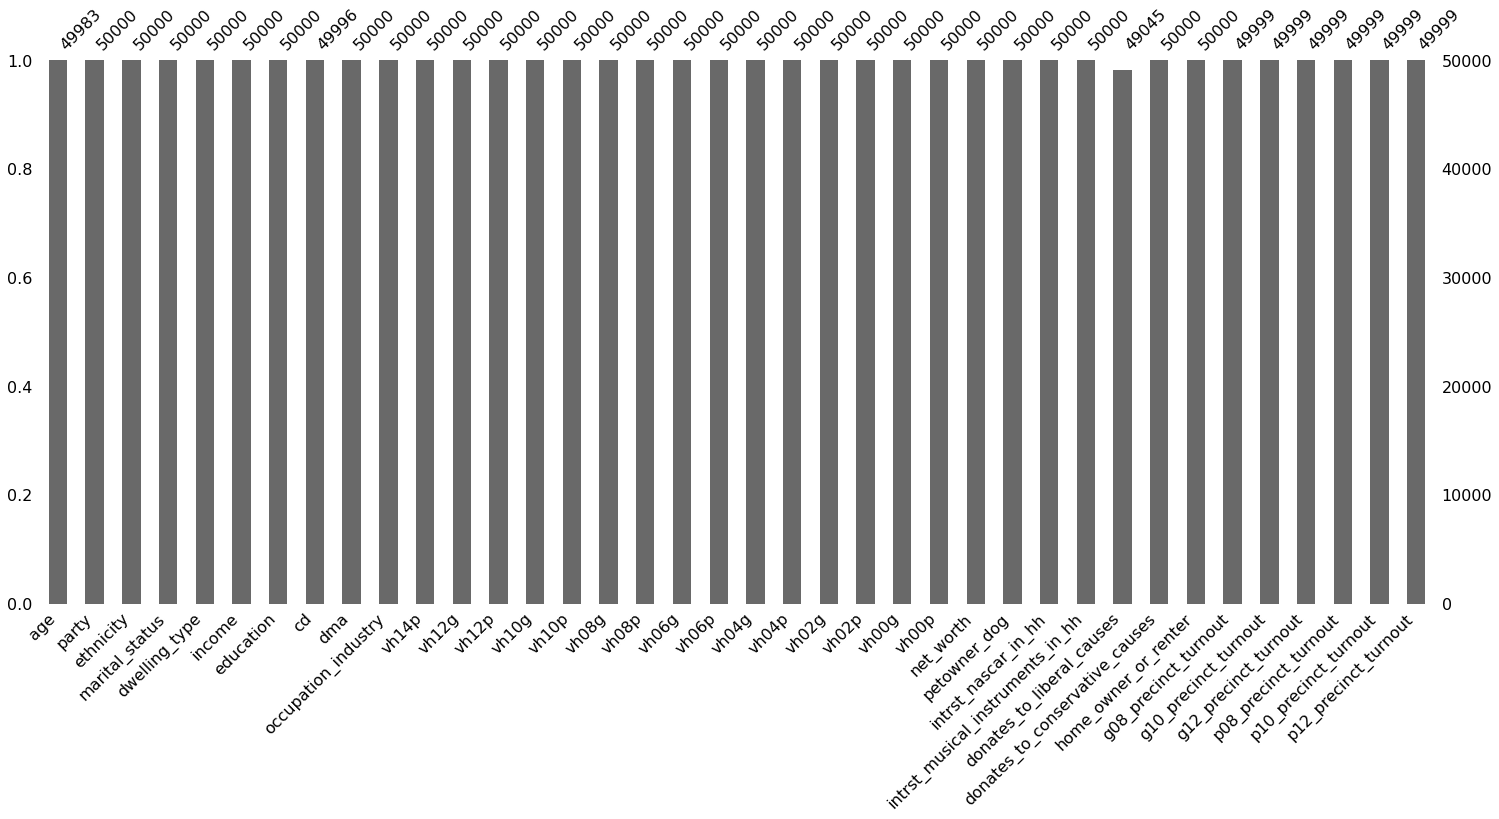

In [4]:
# Check for missing data
import missingno as msno

msno.bar(train)

Even though some columns show that there are missing data under value "nan", neither this chart nor method DataFrame.info() reflect that. Thus, I have to have a closer look at each column's values

age


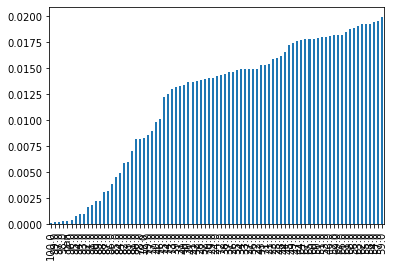

ethnicity


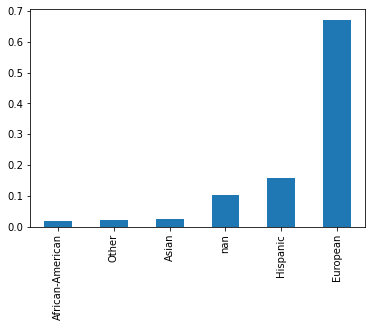

marital_status


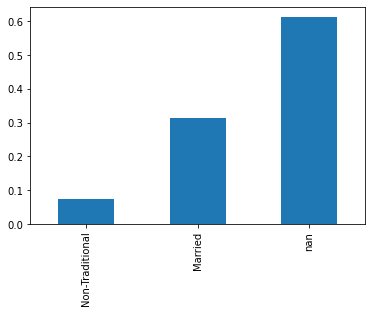

dwelling_type


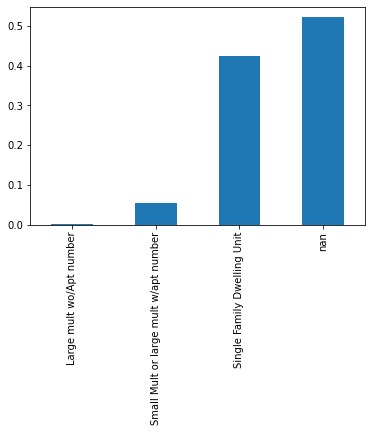

education


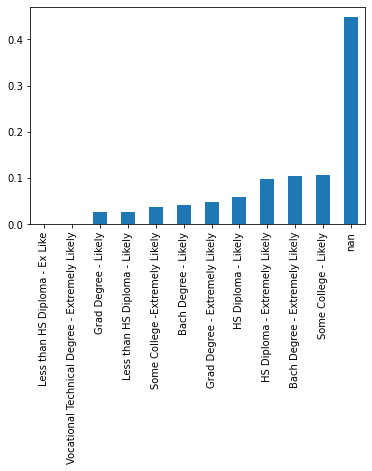

cd


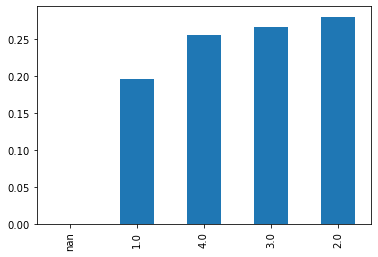

occupation_industry


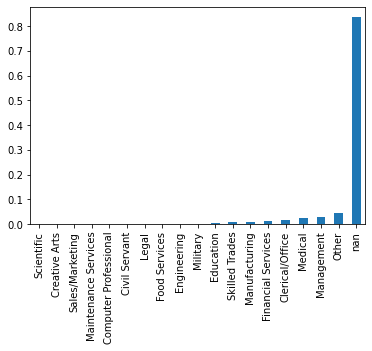

<ipython-input-5-b6ef53df55a6>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if train[col].isnull().sum() > 0 or 'nan' in train[col].unique():


net_worth


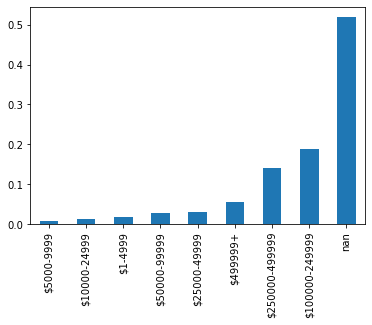

petowner_dog


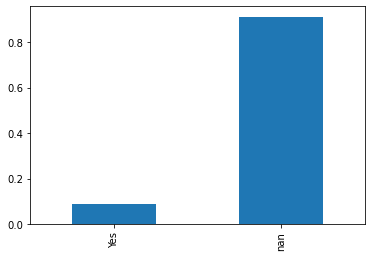

intrst_nascar_in_hh


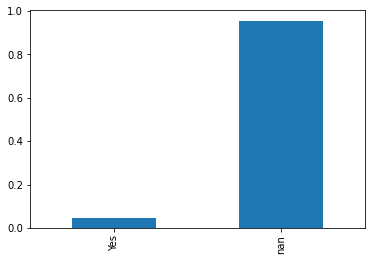

intrst_musical_instruments_in_hh


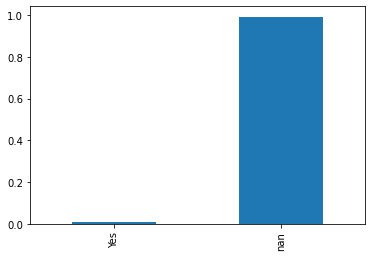

donates_to_liberal_causes


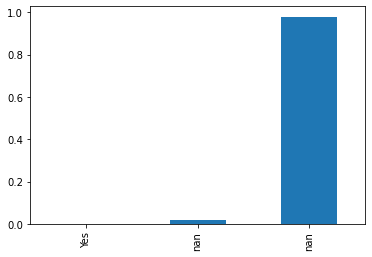

donates_to_conservative_causes


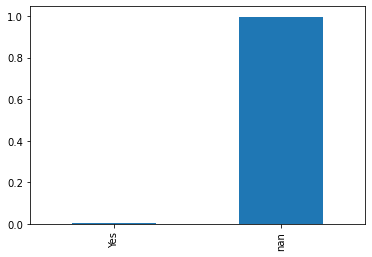

home_owner_or_renter


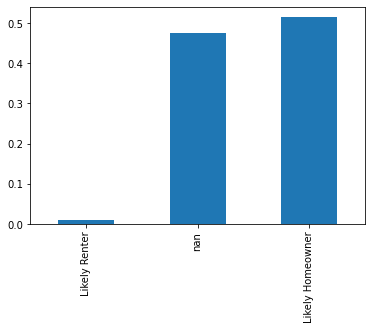

g08_precinct_turnout


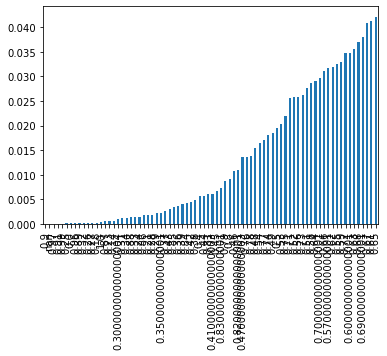

g10_precinct_turnout


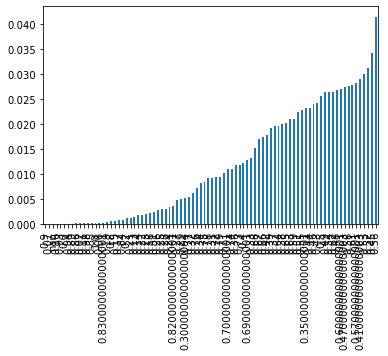

g12_precinct_turnout


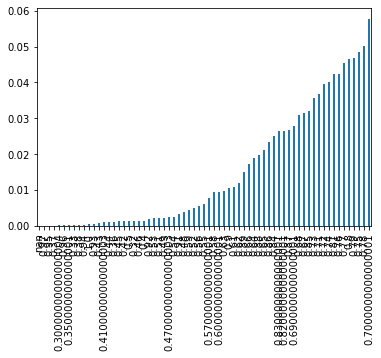

p08_precinct_turnout


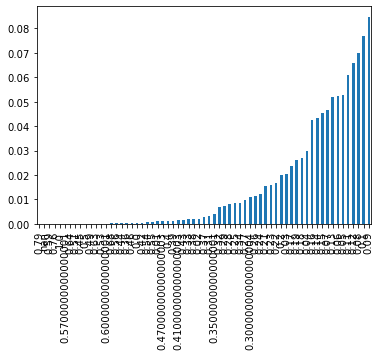

p10_precinct_turnout


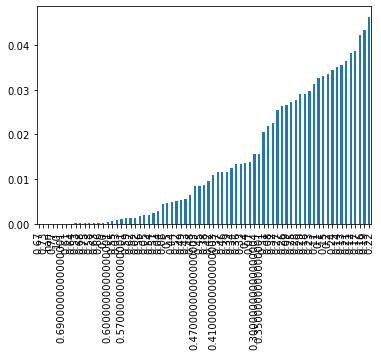

p12_precinct_turnout


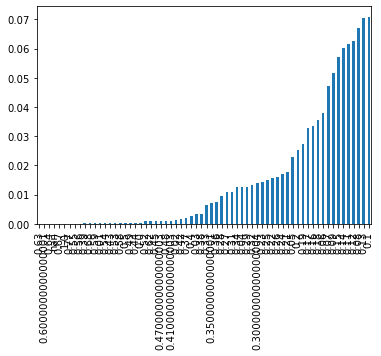

In [5]:
import matplotlib.pyplot as plt

for col in train.columns:
    # Found out 20/37 columns have missing data
    if train[col].isnull().sum() > 0 or 'nan' in train[col].unique():
        print(col)
        train[col].value_counts(normalize=True, dropna=False).sort_values().plot(kind='bar')
        plt.show()

This is my thoughts about each column that has missing data:
* Age: Can be imputed using iterative imputation: other features are used.
* Ethnicity: Even there are “other” values in this column, “nan” still exists, which may indicate a missing-not-at-random pattern (for example, “mixed” type). Thus, nan will be converted to “Unknown” (no imputation)
* Marital status: The missing value outnumbers other values (non-traditional and married) gives me a feeling that this is also a missing-not-at-random pattern. Usually, married and single take the majority part. However, the statistics from https://statisticalatlas.com/place/Nevada/Las-Vegas/Marital-Status shows me that the gap between the two status is not that far (married even outnumbers never married). Therefore, I decide to use the same technique as ethnicity’s
* Dwelling type: Possible candidate for missing values may be homelessness. However, from https://www.usich.gov/homelessness-statistics/nv/, its homeless population is only 6900 out of 3,000,000. I think imputation is too risky. Same technique as ethnicity’s.
* Education: Same technique as ethnicity’s.
* Cd: There are only 4 / 50k. Iterative imputation can work it out.
* Occupation industry: As the missing account for over 80% with the existing of “other”, same technique as ethnicity’s.
* Net_worth: My gut tells me the missing value is highly because survey participants did not want to reveal their property, and it takes as much as half of all survey participants. So, same technique as ethnicity’s.
* petowner_dog, intrst_nascar_in_hh, intrst_musical_instruments_in_hh,: “nan” will become “no” as there are only two values
* donates_to_liberal_causes, donates_to_conservative_causes: In my opinion, they did not want to reveal their political affiliation while those answered “yes” are sure about which party they would like to vote for. Same technique as ethnicity’s.
* home_owner_or_renter: “nan” makes up around 56% beside “Likely renter” and “Likely homeowner”. I have no idea why there is such “likely” but I will leave it as it is or “Unknown”
* g08, g10, g12, p08, p10, p12_precinct_turnout


|              **Column**              | **Iterative Imputation ** | **“nan” / np.nan to “Unknown” as one category** | **“nan” to “No”** |
|:------------------------------------:|:-------------------------:|:-----------------------------------------------:|:-----------------:|
|                 Age                  |             ✓             |                                                 |                   |
|              Ethnicity               |                           |                        ✓                        |                   |
|            Marital status            |                           |                        ✓                        |                   |
|            Dwelling type             |                           |                        ✓                        |                   |
|              Education               |                           |                        ✓                        |                   |
|                  cd                  |             ✓             |                                                 |                   |
|         Occupation industry          |                           |                        ✓                        |                   |
|              Net worth               |                           |                        ✓                        |                   |
|               petowner               |                           |                                                 |         ✓         |
|        intrst\_nascar\_in\_hh        |                           |                                                 |         ✓         |
| intrst\_musical\_instruments\_in\_hh |                           |                                                 |         ✓         |
|     donates\_to\_liberal\_causes     |                           |                        ✓                        |                   |
|  donates\_to\_conservative\_causes   |                           |                        ✓                        |                   |
|       home\_owner\_or\_renter        |                           |                        ✓                        |                   |
|          precinct\_turnouts          |             ✓             |                                                 |                   |

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Prepare columns to be handled
nan_to_no = ['petowner_dog', 'intrst_nascar_in_hh', 'intrst_musical_instruments_in_hh']
nan_to_unknown = ['ethnicity', 'marital_status', 'dwelling_type', 'education', 'occupation_industry', 'net_worth',
                  'donates_to_liberal_causes', 'donates_to_conservative_causes', 'home_owner_or_renter']
numpy_nan_to_unknown = ['donates_to_liberal_causes']
nan_to_be_imputed = ['age', 'cd', 'g08_precinct_turnout', 'g10_precinct_turnout', 'g12_precinct_turnout',
                     'p08_precinct_turnout', 'p10_precinct_turnout', 'p12_precinct_turnout']

# Handle columns having missing data
for col in nan_to_no:
    train[col].replace(to_replace=r'[nN][aA][nN]', value='No', regex=True, inplace=True)
for col in nan_to_unknown:
    train[col].replace(to_replace=r'[nN][aA][nN]', value='Unknown', regex=True, inplace=True)
for col in numpy_nan_to_unknown:
    train[col].replace(to_replace=np.nan, value='Unknown', inplace=True)

for col in nan_to_be_imputed:
    ii = IterativeImputer()
    ii.fit(train[col].values.reshape(-1, 1))
    train[col] = ii.transform(train[col].values.reshape(-1, 1))

C:\Users\dtngh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\dtngh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\dtngh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\dtngh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\dtngh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\dtngh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: Runtime